In [8]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

# Import the TESS PRF modelling from DAVE
import numpy as np
import sys
sys.path
sys.path.append('./dave/diffimg/')
import tessprf as prf

In [13]:
def testRowFrac(datapath):        
    """Test that changing column fraction moves flux around"""

    obj = prf.TessPrf(datapath)
    
    img1 = obj.getPrfAtColRow(123.0, 456, 1,1,1)
    
    for frac in np.linspace(0, .9, 11):
        img2 = obj.getPrfAtColRow(123.0, 456.0 + frac, 1,1,1)
        delta = img2 - img1
        
        prfPlot(img1, delta)
        
        #For TESS, PRFs are 13x13. Check the flux near the centre
        #is moving from lower columns to higher ones
        assert delta[6,6] >= 0, delta[6,6]
        assert delta[7,6] >= 0, delta[7,6]
        assert delta[5,6] <= 0, delta[5,6]

        
def prfPlot(refImg, delta):
        
        kwargs = {'origin':'bottom', 'interpolation':'nearest', 'cmap':plt.cm.YlGnBu_r}
        plt.clf()
        plt.subplot(121)
        plt.imshow(refImg, **kwargs)
        plt.colorbar()
        
        plt.subplot(122)
        kwargs['cmap'] = plt.cm.PiYG
        plt.imshow(delta, **kwargs)  
        vm = max( np.fabs( [np.min(delta), np.max(delta)] ))
#        vm = 1e-2
        plt.clim(-vm, vm)
        plt.colorbar()
        plt.pause(.1)

In [5]:
pathToMatFile = './data/prf/'

<IPython.core.display.Javascript object>


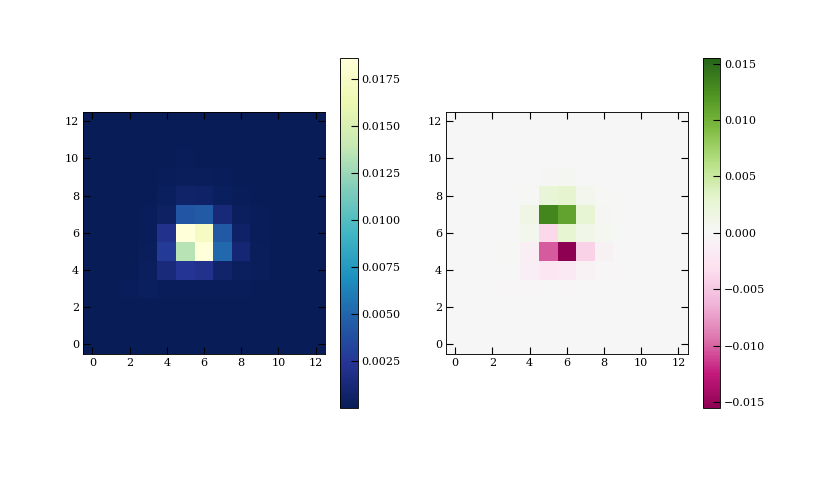

In [14]:
testRowFrac(pathToMatFile)